# [IAPR 2019:][iapr2019] Special project

**Group members:**
    1- first name and last name,
    2- first name and last name,
    3- first name and last name

**Due date:** 30.05.2019

[iapr2019]: https://github.com/LTS5/iapr-2019


## Description
Please find the description of this special project via [this link].

[this link]: https://github.com/LTS5/iapr-2019/blob/master/project/special_project_description.pdf

## Part 1: Finding varroas by segmentation
Add your implementation for ''**detect_by_segmentation**'' function. Please make sure the input and output follows the mentioned format.

In [1]:
def detect_by_segmentation(img):
    '''
    Input: One single image
    Output: A numpy array containing coordonates of all detected varroas, with the following format: 
            [[x_1, y_1, w_1, h_2], [x_2, y_2, w_1, h_2], ..., [x_n, y_n, w_n, h_n]] 
            where ''n'' is the number of detected varroas.
    '''

    #Your code

Add your implementation. Report the Precision, Recall and F1-score, by using all 50 images of the test-set, and considering 0.3 as the IoU threshold.

In [2]:
#Your code

## Part 2: Implement your first detector

Write your function(s) for the second part. Feel free to change the name of the function and add your additional functions, but please make sure their input and output follows the mentioned format.

Add your implementation. Report the Precision, Recall and F1-score, by using all 50 images of the test-set, and considering 0.3 as the IoU threshold.

In [3]:
%reload_ext autoreload

from itertools import product
from IPython.core.debugger import set_trace
from numpy.random import randint
import numpy as np
import description
import matplotlib.pyplot as plt
import skimage
import matplotlib.patches as patches
from description import parse_file, load_no_bug_annotations,\
    load_bug_annotations, sliding_window, get_performance_scores,\
    create_dataset, pca_extract, visualise_bboxes, sift_extract, combined_extract, fd_extract, segment

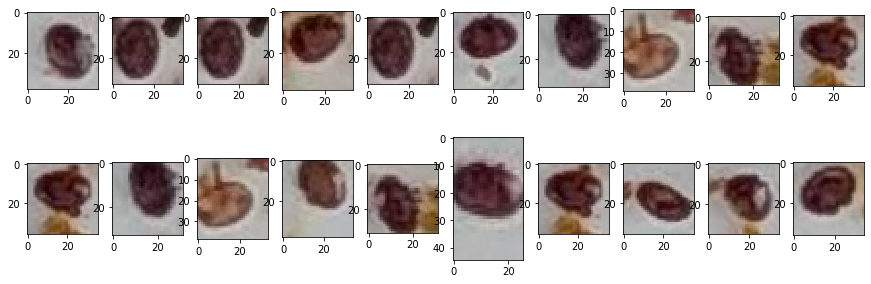

In [4]:
# Plot the bugs
%autoreload

bug_annotations = load_bug_annotations('train', n_bboxes=20)

M, N = 2, 10

fix, ax = plt.subplots(M, N, figsize=(15, 5))

for i, j in product(range(M), range(N)):
    vaorra_index = randint(0, len(bug_annotations))
    img = bug_annotations[vaorra_index]['bbox_img']
    ax[i, j].imshow(img)

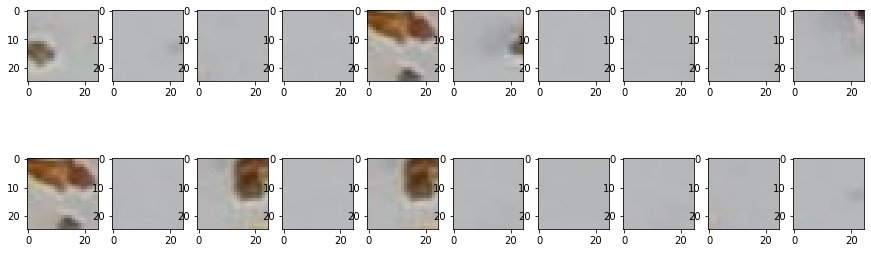

In [5]:
# Plot no bugs

no_bug_annotations = load_no_bug_annotations('train', n_bboxes=20)

M, N = 2, 10

fix, ax = plt.subplots(M, N, figsize=(15, 5))

for i, j in product(range(M), range(N)):
    vaorra_index = randint(0, len(no_bug_annotations))
    img = no_bug_annotations[vaorra_index]['bbox_img']
    ax[i, j].imshow(img)

In [6]:
# Create train dataset
%autoreload

X_train, y_train = create_dataset('train', n_bboxes=1000)
X_test, y_test = create_dataset('test', n_bboxes=1000)

Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done


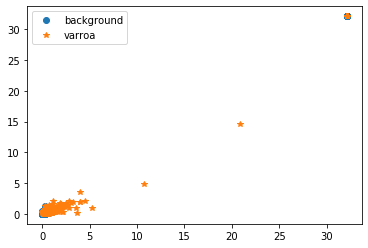

In [7]:
%autoreload

X_train_fd = fd_extract(X_train)

# Plot
background = X_train_fd[np.array(y_train) == 0]
target = X_train_fd[np.array(y_train) == 1]

plt.plot(background[:, 0], background[:, 1], 'o', label='background')
plt.plot(target[:, 0], target[:, 1], '*', label='varroa')
plt.legend()

PCA based extraction has been started...
PCA based extraction is done...


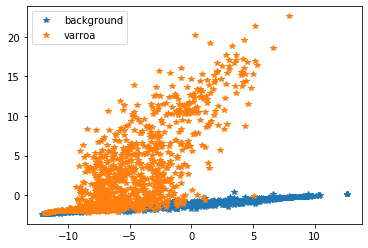

In [8]:
%autoreload

X_train_pca, pca_model = pca_extract(X_train, grayscale=True)
# X_train_pca = X_train_pca / np.max(X_train_pca)

# Plot
background = X_train_pca[np.array(y_train) == 0]
target = X_train_pca[np.array(y_train) == 1]

plt.plot(background[:, 0], background[:, 1], '*', label='background')
plt.plot(target[:, 0], target[:, 1], '*', label='varroa')
plt.legend()

SIFT based extraction has been started...
SIFT based extraction is done...


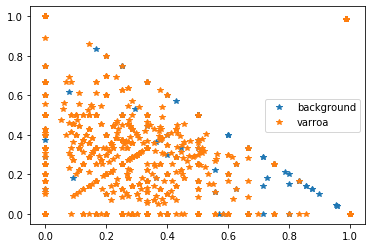

In [9]:
%autoreload

X_train_sift = sift_extract(X_train)

# Plot
background = X_train_sift[np.array(y_train) == 0]
target = X_train_sift[np.array(y_train) == 1]

plt.plot(background[:, 0], background[:, 1], '*', label='background')
plt.plot(target[:, 0], target[:, 1], '*', label='varroa')
plt.legend()

In [10]:
%autoreload

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train_comb, pca_model = combined_extract(X_train)
X_test_comb, _ = combined_extract(X_test, pca_model=pca_model)

params = {'C': [100, 250 ], 'gamma': [ 0.05, 0.1 ]}
svc = SVC(class_weight='balanced', probability=True)
clf = GridSearchCV(svc, params, cv=5)
clf = clf.fit(X_train_comb, y_train)

print()
print('Best classifier')
print(clf.best_estimator_)

y_pred = clf.predict(X_test_comb)

print()
print('Classification report')
print(classification_report(y_test, y_pred, target_names=['background', 'varroa']))

PCA based extraction has been started...
PCA based extraction is done...
SIFT based extraction has been started...
SIFT based extraction is done...
Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done
Combining results...
PCA based extraction has been started...
PCA based extraction is done...
SIFT based extraction has been started...
SIFT based extraction is done...
Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done
Combining results...

Best classifier
SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classification report
              precision    recall  f1-score   support

  background       0.99      0.99      0.99      1312
      varroa       0.97      0.98      0.97       582

   micro avg       0.98      0

Loading windows...
Running classifier...
PCA based extraction has been started...
PCA based extraction is done...
SIFT based extraction has been started...
SIFT based extraction is done...
Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done
Combining results...
Classifing bounding boxes...
Filtering bounding boxes...


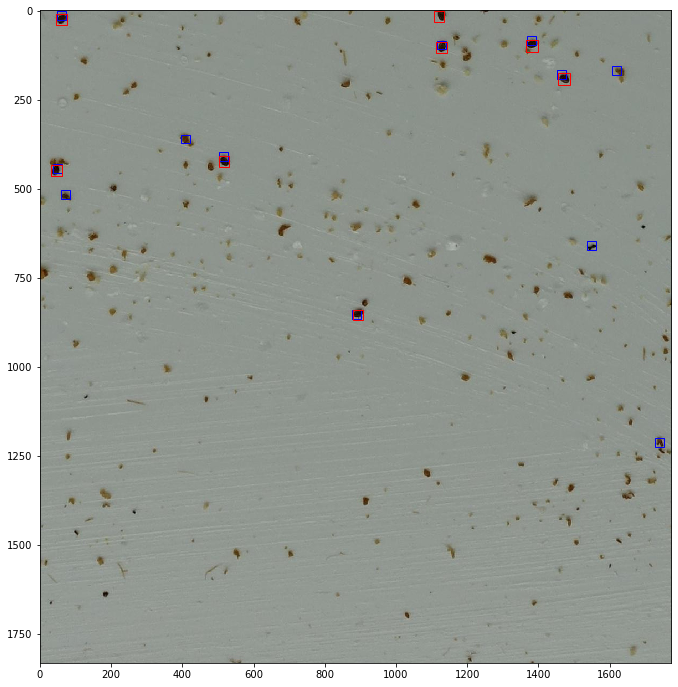

In [17]:
%autoreload

BBOX_ID = 10
filename = X_test[BBOX_ID]['filename']
xml = X_test[BBOX_ID]['xml']

img = skimage.io.imread(filename)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(img)

bboxes = segment(img, clf, pca_model=pca_model)

for x, y, w, h in bboxes:
    rect = patches.Rectangle((x, y), w, h, linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
        
annots = parse_file(xml)
for annot in annots:
    bbox = annot['bbox']
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [18]:
get_performance_scores(img, annots, bboxes, 0.3)

TP FN FP = 4 3 5
Precision = 0.44
Recall = 0.57
F1-score = 0.50


(0.4444444444444444, 0.5714285714285714, 0.5)

## Part 3: Using MLP and CNNs

Add your implementation for the thrid part. Feel free to add your desirable functions, but please make sure you have proper functions for the final detection, where their input and output follows the same format as the previous parts.

In [ ]:
#Your code

## Challenge

You can generate a json submission file by using the function ''**generate_pred_json**''. This prediction file can be uploaded online for evaluation (Please refer to section 3 of the project description for more details).

In [ ]:
import numpy as np
import json

def generate_pred_json(data, tag='baseline'):
    '''
    Input
    - data: Is a dictionary d, such that:
          d = { 
              "ID_1": [], 
              "ID_2": [[x_21, y_21, w_21, h_21], [x_22, y_22, w_22, h_22]], 
              ... 
              "ID_i": [[x_i1, y_i1, w_i1, h_i1], ..., [x_iJ, y_iJ, w_iJ, h_iJ]],
              ... 
              "ID_N": [[x_N1, y_N1, w_N1, h_N1]],
          }
          where ID is the string id of the image (e.i. 5a05e86fa07d56baef59b1cb_32.00px_1) and the value the Kx4 
          array of intergers for the K predicted bounding boxes (e.g. [[170, 120, 15, 15]])
    - tag: (optional) string that will be added to the name of the json file.
    Output
      Create a json file, "prediction_[tag].json", conatining the prediction to EvalAI format.
    '''
    unvalid_key = []
    _data = data.copy()
    for key, value in _data.items():
        try:
            # Try to convert to numpy array and cast as closest int
            print(key)
            v = np.around(np.array(value)).astype(int)
            # Check is it is a 2d array with 4 columns (x,y,w,h)
            if v.ndim != 2 or v.shape[1] != 4:
                unvalid_key.append(key)
            # Id must be a string
            if not isinstance(key, str):
                unvalid_key.append(key)
            _data[key] = v.tolist()
        # Deal with not consistant array size and empty predictions
        except (ValueError, TypeError):
            unvalid_key.append(key)
    # Remove unvalid key from dictionnary
    for key in unvalid_key: del _data[key]
    
    with open('prediction_{}.json'.format(tag), 'w') as outfile:
        json.dump(_data, outfile)

In [ ]:
#Your code